<a href="https://colab.research.google.com/github/shreekrishh/Machine-Learning/blob/main/Algotrading_classfication_on_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Momentum strategy using ML algorithms** 

We are going to use classification algorithms of machine learning to obtain ***signals of buying and selling as labels***. Technique will involve of feature selection to get new features in the form of technical indicators based on stock price of a portfolio over a time. We will use 9 years of data to make sure we are having enough number of datapoints. 

Features we will create: 


1.   Exponential Moving Average (21 days)
2. Exponential Moving Average  (63 days)
3. Exponential moving average (252 days)
4. Rate of Change (21 days)
5. Rate of Change (63 days)
6. Rate of change (252 days) 
7. Price Momentum (21 days)
8. Price Momentum (63 days)
9. RSI (21 days)
10. RSI (63 days)
11. RSI (252 days)
12. Stochastic Oscillator K (21 days)
13. Stochastic Oscillator K (63 days)
14. Stochastic Oscillator K (252 days)
15. Stochastic Oscillator D (21 days)
16. Stochastic Oscillator D (63 days)
17. Stochastic Oscillator D (252 days)
18. KAMA (Kaufmann Adapative MA) (21 days)
19. KAMA (Kaufmann Adapative MA) (63 days)
20. Williams R (lookback period = 14)


Algorithms we will apply:

1. Decision Tree
2. Random Forest
3. Gaussian Naive Bayes
4. Support Vector Machines
5. KNN



We will talk about them in detail later


In [1]:
!pip install yahoofinancials
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=60d3189cb8f50eca86dd49c9b97b55a68abdac11205ecc3fad883d52b921ba5b
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 35.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all

In [2]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=43b58ad8ce55d549731a9710bcc08fe28b315ce1dd2761f91ca300eb844f8edb
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


#Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import ta

#Setting parameters for dataset
We are importing dataset of 5 tickers of technology sector from S&P 500 for 9 years, from (2010, 1, 1) to (2019, 1, 1)

In [4]:
tickers = ['AMAT', 'ADSK', 'CSCO', 'CTXS', 'CTSH']
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,1,1)

In [5]:
def get_data_for_ticker(ticker):
  data = yf.download(ticker, start, end)
  return data

In [6]:
df1 = get_data_for_ticker(tickers[0])
df2 = get_data_for_ticker(tickers[1])
df3 = get_data_for_ticker(tickers[2])
df4 = get_data_for_ticker(tickers[3])
df5 = get_data_for_ticker(tickers[4])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
pd.set_option('display.max_rows', None)

#Introducing Labels
We are going to introduce signals of buying and selling by normal moving average uptrend or downtrend. 


*   Signal = 1 (if short moving average > long moving average)
*   Signal = 0 (if short moving avergae < long moving average)



In [8]:
def add_signal(data):
  data['short_avg'] = data['Close'].rolling(window = 25, min_periods = 1, center = False).mean()
  data['long_avg'] = data['Close'].rolling(window = 100, min_periods = 1, center = False).mean()
  data['signal'] = np.where( data['short_avg'] > data['long_avg'], 1, 0)

  return data


In [9]:
data1 = add_signal(df1)
data2 = add_signal(df2) 
data3 = add_signal(df3) 
data4 = add_signal(df4) 
data5 = add_signal(df5) 


In [10]:
total_data = [data1, data2, data3, data4, data5]

In [11]:
data1

,Open,High,Low,Close,Adj Close,Volume,short_avg,long_avg,signal
Date,,,,,,,,,
2010-01-04,14.050000,14.570000,14.030000,14.300000,11.385155,18615100,14.300000,14.300000,0
2010-01-05,14.240000,14.380000,14.040000,14.190000,11.297578,15173200,14.245000,14.245000,0
2010-01-06,14.230000,14.400000,14.100000,14.160000,11.273694,13704800,14.216667,14.216667,0
2010-01-07,14.140000,14.210000,13.960000,14.010000,11.154267,21543200,14.165000,14.165000,0
2010-01-08,14.240000,14.590000,14.110000,14.550000,11.584199,41212100,14.242000,14.242000,0
2010-01-11,14.840000,14.940000,14.450000,14.870000,11.838967,33667800,14.346667,14.346667,0
2010-01-12,14.760000,14.770000,14.030000,14.200000,11.305537,40350900,14.325714,14.325714,0
2010-01-13,14.290000,14.420000,13.920000,14.270000,11.361270,25137300,14.318750,14.318750,0
2010-01-14,14.220000,14.380000,14.020000,14.350000,11.424964,26920500,14.322222,14.322222,0


#Feature Engineering
We will use some indicators, momentum indicators precisely. They will be our dependent variables of fitting equation. These indicators may high very high correlation with each other (we will check it later). For now we will add them and understand why they are added as features.

We are using oscillators and momentum indicators which represent volatility and trend at the same time. All these indicators' outputs are single values telling us type of trend giving us signals.

In [12]:
def add_ROC(df, days):
  ROC = pd.Series(ta.momentum.roc(df['Close'], days, fillna =False))
  return ROC


def add_PM(df, days):   
  PM = pd.Series(df['Close'].diff(days))
  return PM


def add_EMA(df, days):
  EMA = df['Close'].ewm(span=days, adjust=False).mean()
  return EMA

def add_stochastic_K(df, days):
  stochastic_k = pd.Series((ta.momentum.stochrsi_k(df['Close'], window=days, smooth1=4, smooth2=3)*100).round(5))
  return stochastic_k


def add_stochastic_D(df, days):
  stochastic_D = pd.Series((ta.momentum.stochrsi_d(df['Close'], window=days, smooth1=4, smooth2=3)*100).round(5))
  return stochastic_D

def add_RSI(df, days):
  rsi = pd.Series(ta.momentum.rsi(df['Close'], window=days,fillna=False))
  return rsi


def add_kama(df, days):
  kama = pd.Series(ta.momentum.kama(df['Close'], window = days, pow1=9, pow2=54))
  return kama

def add_williamR(df, days):
  willR = pd.Series(ta.momentum.williams_r(df['High'], df['Low'], df['Close'], lbp=14, fillna=False))
  return willR

In [13]:
for i in range(len(tickers)):
  total_data[i]['EMA_21'] = add_EMA(total_data[i], 21)
  total_data[i]['EMA_63'] = add_EMA(total_data[i], 63)
  total_data[i]['EMA_252'] = add_EMA(total_data[i], 252)
  total_data[i]['ROC_21'] = add_ROC(total_data[i], 21)
  total_data[i]['ROC_63'] = add_ROC(total_data[i], 63)
  total_data[i]['ROC_252'] = add_ROC(total_data[i], 252)
  total_data[i]['PMo_21'] = add_PM(total_data[i], 21)
  total_data[i]['PMo_63'] = add_PM(total_data[i], 63)
  total_data[i]['stocK_21'] = add_stochastic_K(total_data[i], 21)
  total_data[i]['stocK_63'] = add_stochastic_K(total_data[i], 63)
  total_data[i]['stocK_252'] = add_stochastic_K(total_data[i], 252)
  total_data[i]['stocD_21'] = add_stochastic_D(total_data[i], 21)
  total_data[i]['stocD_63'] = add_stochastic_D(total_data[i], 63)
  total_data[i]['stocD_252'] = add_stochastic_D(total_data[i], 252) 
  total_data[i]['rsi_21'] = add_RSI(total_data[i], 21)
  total_data[i]['rsi_63'] = add_RSI(total_data[i], 63)
  total_data[i]['rsi_252'] = add_RSI(total_data[i], 252)
  total_data[i]['kama_21'] = add_kama(total_data[i], 21)
  total_data[i]['kama_63'] = add_kama(total_data[i], 63)
  total_data[i]['willR'] = add_williamR(total_data[i], 14)

In [14]:
for i in range(len(tickers)):
  total_data[i] = total_data[i].dropna()
  


In [15]:
data1 = total_data[0]
data2 = total_data[1]
data3 = total_data[2]
data4 = total_data[3]
data5 = total_data[4]

#this was a complete data including OHLCV

In [16]:
dataset = []
for i in range(len(tickers)):
  dataset1= total_data[i].drop(['Open', 'Close', 'High', 'Low', 'Adj Close','Volume', 'short_avg', 'long_avg'],axis=1)
  dataset1 = dataset1.dropna()
  dataset.append(dataset1)

In [17]:
dataset1 = dataset[0]
dataset2 = dataset[1]
dataset3 = dataset[2]
dataset4 = dataset[3]
dataset5 = dataset[4]
#these do not have OHLCV

In [18]:

dataset1.isnull().sum()

signal       0
EMA_21       0
EMA_63       0
EMA_252      0
ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
kama_63      0
willR        0
dtype: int64

In [19]:
data1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
short_avg    0
long_avg     0
signal       0
EMA_21       0
EMA_63       0
EMA_252      0
ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
kama_63      0
willR        0
dtype: int64

#EDA
we will plot some graphs of the data, purpose of performing EDA in this case is to find the correlation between those features we added. If two of the features are having high correlation we might want to drop one of those features to remove redundancy. We will also check the signal's dependency on features. We will drop some of those which do not affect signal in any sense.

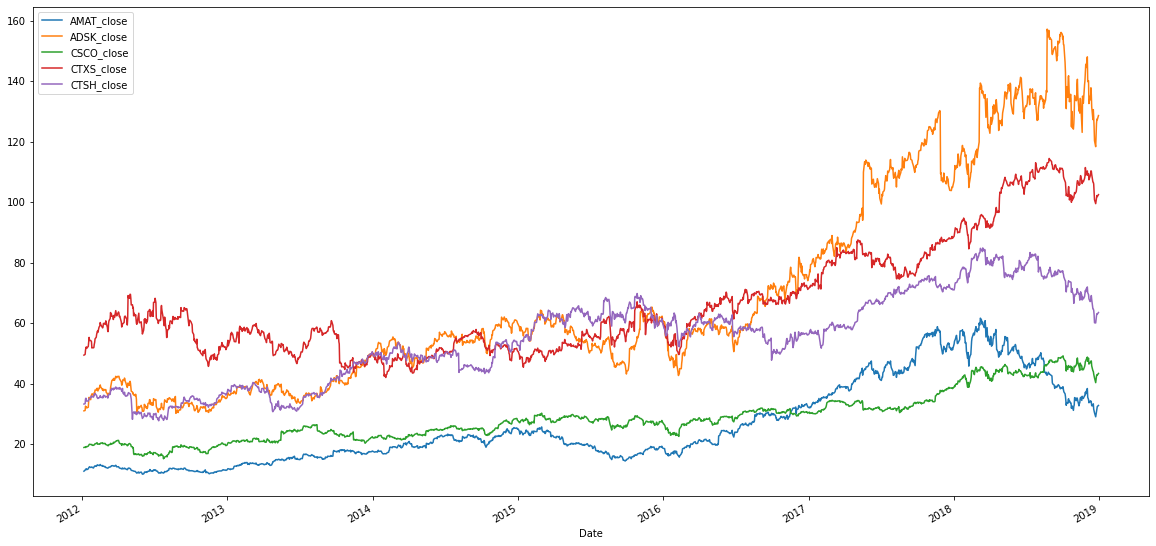

In [20]:
close_data = pd.DataFrame([data1['Close'], data2['Close'], data3['Close'], data4['Close'], data5['Close']])
close_data = close_data.T
close_data.columns = ['AMAT_close', 'ADSK_close', 'CSCO_close', 'CTXS_close', 'CTSH_close']
close_data.plot(figsize=(20,10))



In [21]:
for data in dataset:
  print(data['signal'].value_counts())


1    1216
0     541
Name: signal, dtype: int64
1    1184
0     573
Name: signal, dtype: int64
1    1172
0     585
Name: signal, dtype: int64
1    1104
0     653
Name: signal, dtype: int64
1    1097
0     660
Name: signal, dtype: int64


plot for  AMAT


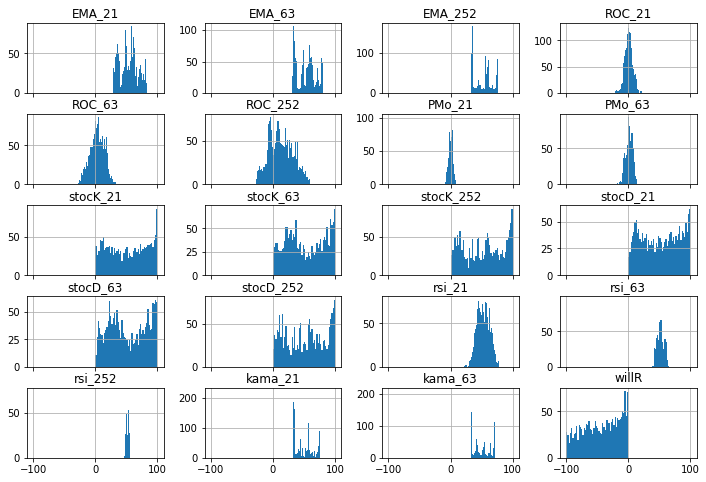

plot for  ADSK


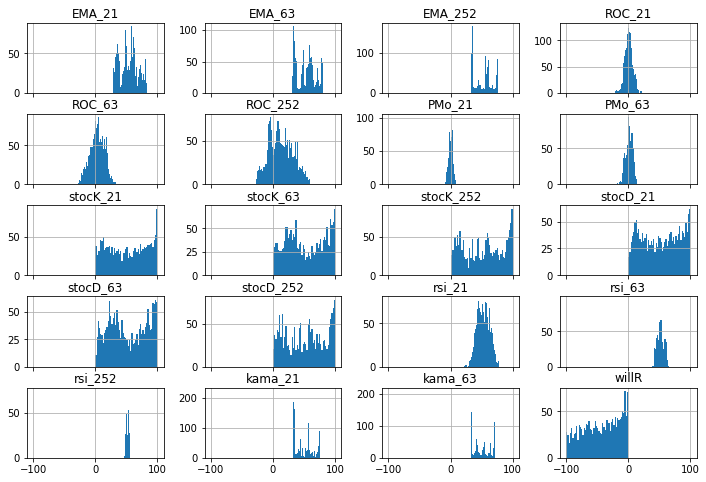

plot for  CSCO


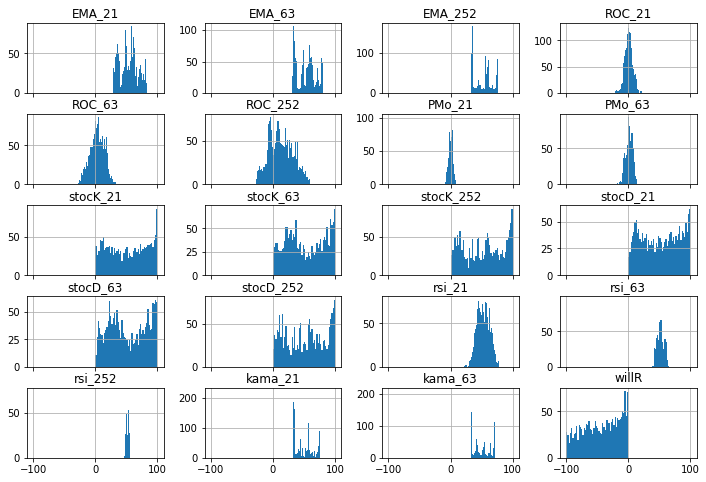

plot for  CTXS


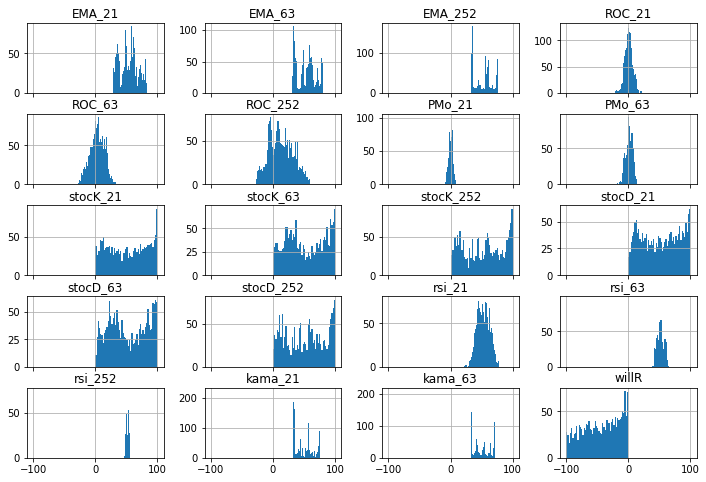

plot for  CTSH


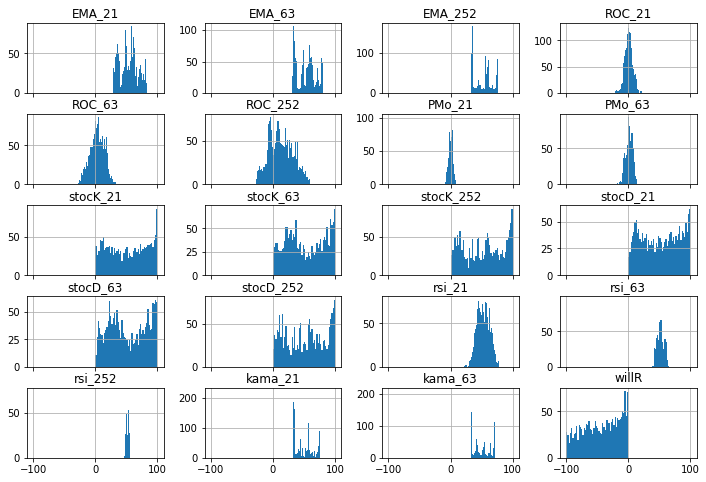

In [22]:
def plot_histograms(df):
  y = df['signal']
  x = df.drop(['signal'], axis=1)
  columns = x.columns
  x.hist(bins=50, sharex=True, figsize=(12,8))
  plt.show()


for i in range(len(dataset)):
  print('plot for ', tickers[i])
  plot_histograms(data)

In [23]:
dataset1.isnull().sum()

signal       0
EMA_21       0
EMA_63       0
EMA_252      0
ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
kama_63      0
willR        0
dtype: int64

correlation matrix for  AMAT


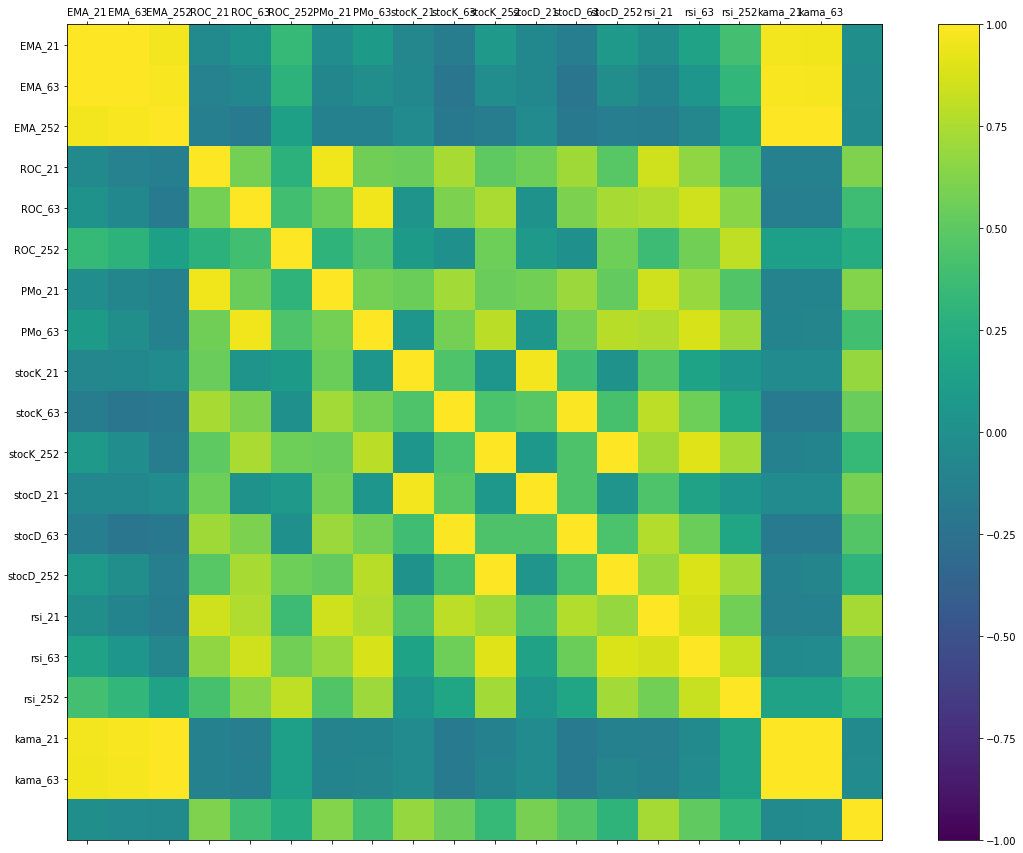

correlation matrix for  ADSK


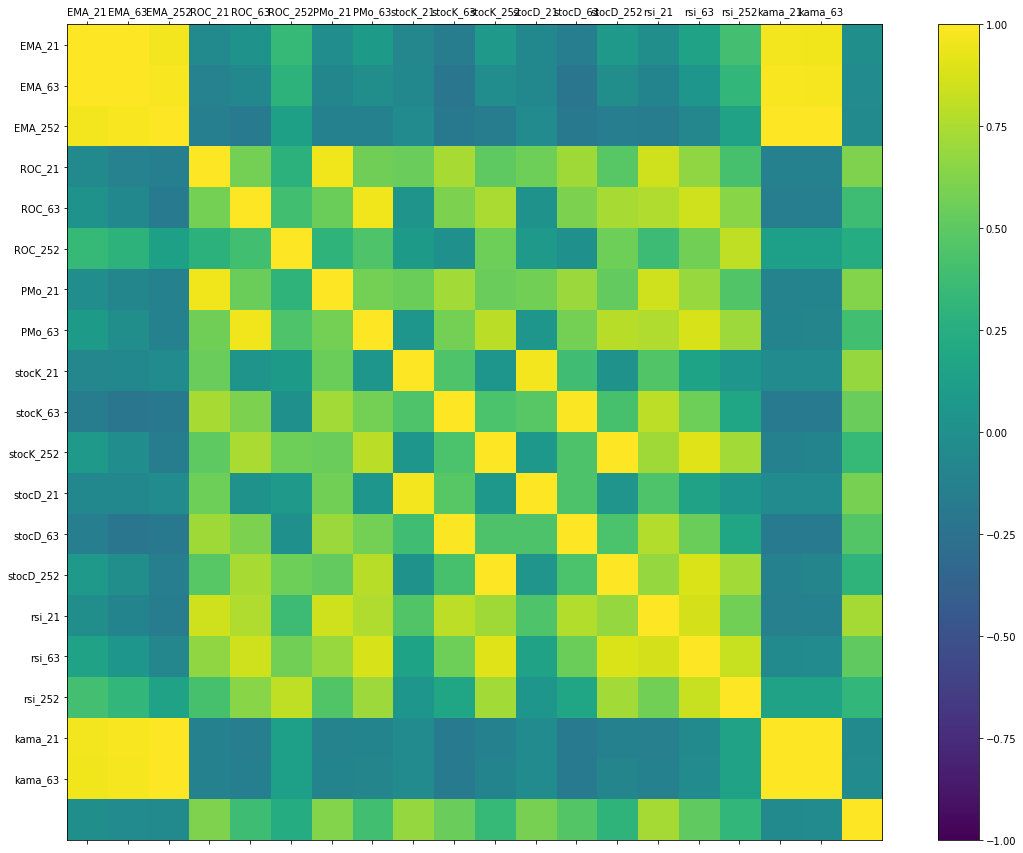

correlation matrix for  CSCO


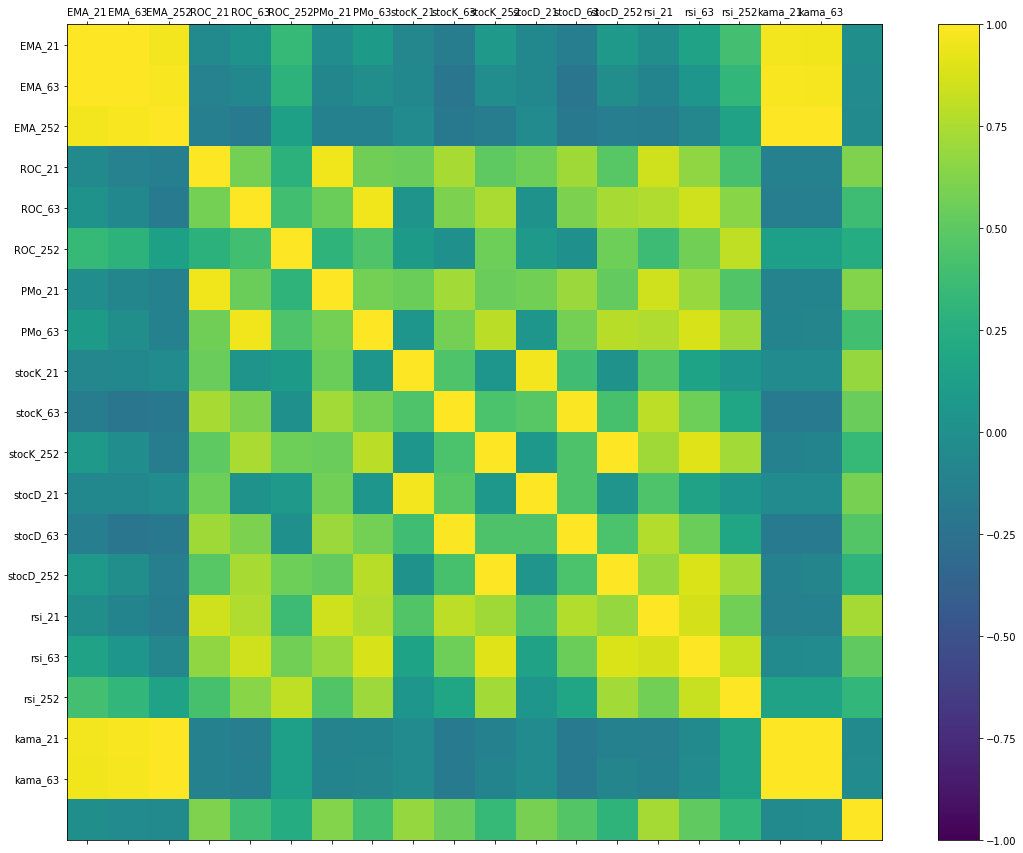

correlation matrix for  CTXS


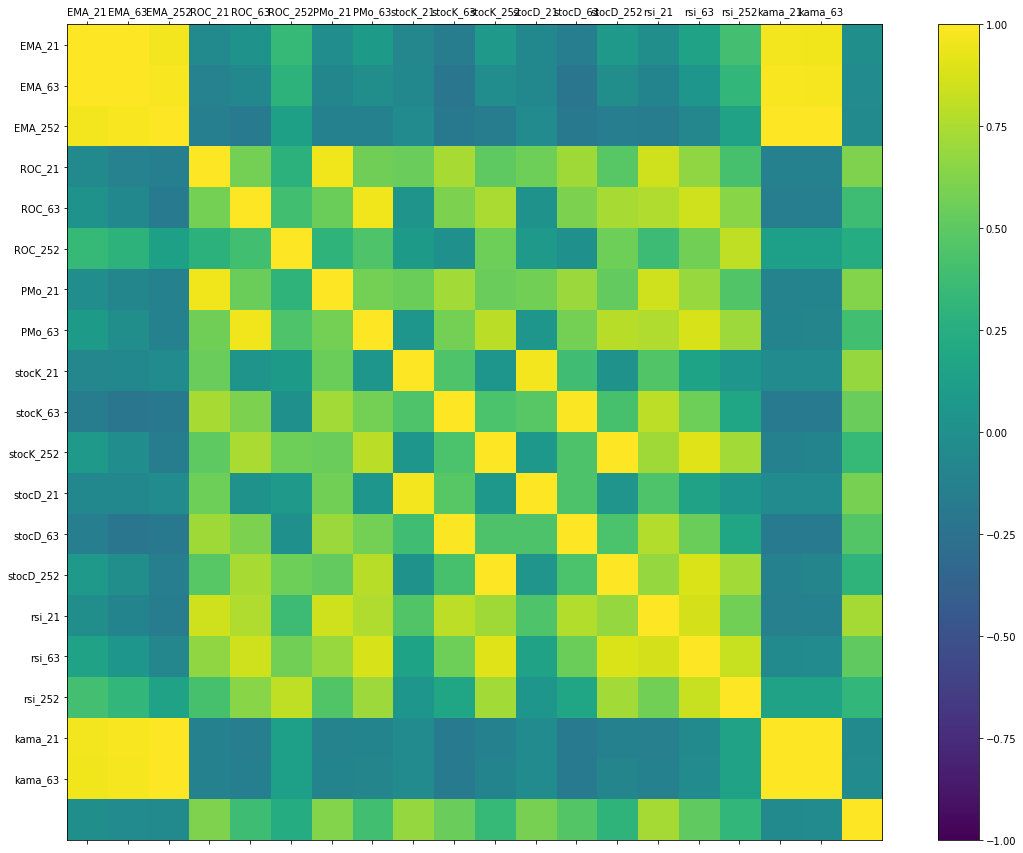

correlation matrix for  CTSH


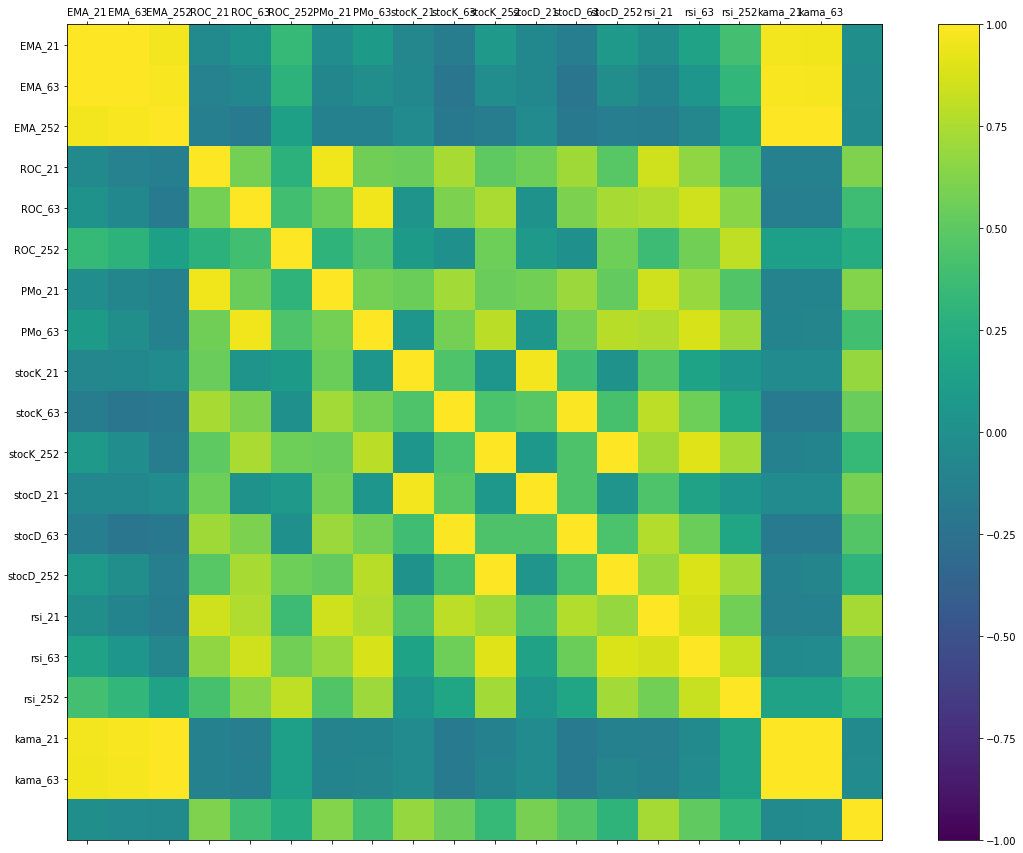

In [24]:
def correlation_matrix(df):
  y = df['signal']
  x = df.drop(['signal'], axis=1)
  columns = x.columns
  correlations = x.corr()
  fig = plt.figure(figsize = (20,15))
  ax = fig.add_subplot(111)
  cax = ax.matshow(correlations, vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,19,1)
  ax.set_xticks(ticks)
  ax.set_yticks(ticks)
  ax.set_xticklabels(columns)
  ax.set_yticklabels(columns)
  plt.show()


for i in range(len(dataset)):
  print('correlation matrix for ', tickers[i])
  correlation_matrix(data)



we can see kama and ema are having correlation with each other. even one type of ema is also highly correlated with its other kind. So, we will remove all ema and one kama. 

In [25]:
for i in range(len(tickers)):
  total_data[i] = total_data[i].drop(['kama_63', 'EMA_21', 'EMA_63', 'EMA_252'],axis=1)
  dataset[i] = dataset[i].drop(['kama_63', 'EMA_21', 'EMA_63', 'EMA_252'],axis=1)

#these do not have OHLCV
dataset1 = dataset[0]
dataset2 = dataset[1]
dataset3 = dataset[2]
dataset4 = dataset[3]
dataset5 = dataset[4]


#complete data including OHLCV
data1 = total_data[0]
data2 = total_data[1]
data3 = total_data[2]
data4 = total_data[3]
data5 = total_data[4]



# Feature selection


In [26]:
dataset1.isnull().sum()

signal       0
ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
willR        0
dtype: int64

In [27]:
import sklearn
from sklearn.ensemble import RandomForestRegressor


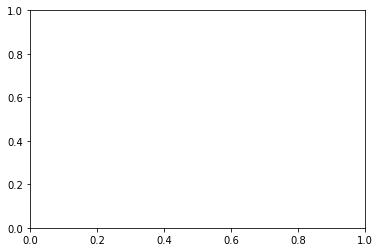

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [29]:
 rf = RandomForestRegressor(n_estimators=150)

In [30]:
def dependency(df):
  y = df['signal']
  x = df.drop(['signal'], axis=1)
  rf.fit(x, y)
  Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=x.columns)
  print(Importance.sort_values('Importance', axis=0, ascending=True))
  Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
  plt.xlabel('Variable Importance')
  plt.gca().legend_ = None


dependency of signal on features of  AMAT
           Importance
rsi_21       0.514608
stocK_63     0.610809
willR        1.016008
EMA_252      1.066708
rsi_252      1.252180
PMo_21       1.328377
ROC_21       1.366677
kama_21      1.409012
stocD_63     1.513350
rsi_63       1.517517
stocK_252    1.528298
kama_63      1.801636
EMA_21       2.375986
EMA_63       2.584605
stocD_21     3.178493
ROC_252      5.286031
stocD_252    8.642881
stocK_21     9.429944
ROC_63      15.920334
PMo_63      37.656547
dependency of signal on features of  ADSK
           Importance
rsi_21       0.505272
stocK_63     0.604680
EMA_252      0.912003
willR        1.037910
rsi_252      1.154728
kama_21      1.313662
PMo_21       1.362168
ROC_21       1.385933
stocK_252    1.520207
stocD_63     1.523542
rsi_63       1.683024
kama_63      2.105622
EMA_63       2.205615
EMA_21       2.628461
stocD_21     3.044342
ROC_252      5.616354
stocD_252    8.141336
stocK_21     9.795006
ROC_63      18.533828
PMo_63      34

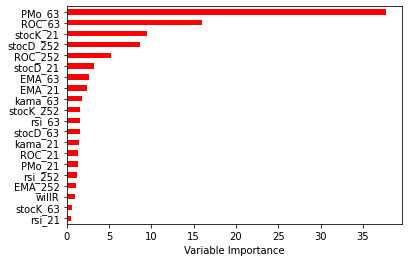

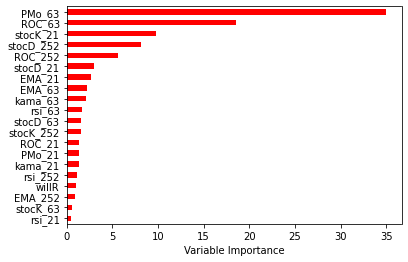

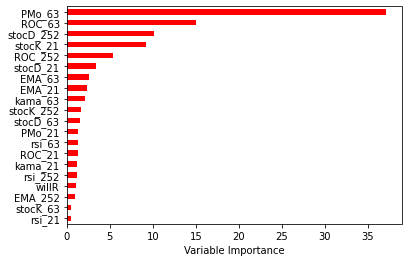

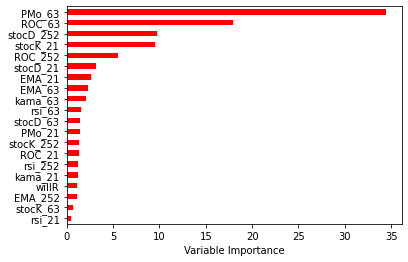

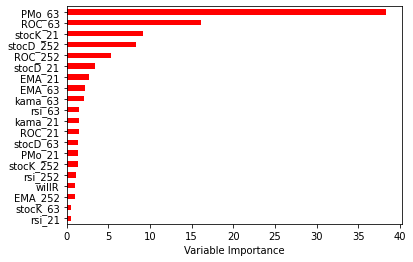

In [31]:
for i in range(len(dataset)):
  print('dependency of signal on features of ', tickers[i])
  dependency(data)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [33]:
dataset1.isnull().sum()

signal       0
ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
willR        0
dtype: int64

#Splitting

In [34]:


def split(data):
    y = data['signal']
    x = data.drop(['signal'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 41)
    return x_train, x_test, y_train, y_test



In [35]:
rs = RobustScaler() 

OHLCV = []
x_train_dataset = []
y_train_dataset = []
x_test_dataset = []
y_test_dataset = []
for i in range(len(total_data)):
  x_train, x_test, y_train, y_test = split(total_data[i])
  x_train_1 = x_train.drop(['Close', 'Open', 'High', 'Low', 'Adj Close','Volume','short_avg','long_avg'], axis=1)
  x_test_1 = x_test.drop(['Close', 'Open', 'High', 'Low', 'Adj Close', 'Volume','short_avg','long_avg'], axis = 1)
  
  features = x_train_1.columns
  rs.fit(x_train_1)
  x_train_1[features] = rs.transform(x_train_1.values)
  x_test_1[features] = rs.transform(x_test_1.values)

  x_train_dataset.append(x_train_1)
  y_train_dataset.append(y_train)
  x_test_dataset.append(x_test_1)
  y_test_dataset.append(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature na

In [36]:
x_train_1 = x_train_dataset[0] 
x_train_2 = x_train_dataset[1] 
x_train_3 = x_train_dataset[2] 
x_train_4 = x_train_dataset[3] 
x_train_5 = x_train_dataset[4]

y_train_1 = y_train_dataset[0]
y_train_2 = y_train_dataset[1]
y_train_3 = y_train_dataset[2]
y_train_4 = y_train_dataset[3]
y_train_5 = y_train_dataset[4]

x_test_1 = y_train_dataset[0]
x_test_2 = y_train_dataset[1]
x_test_3 = y_train_dataset[2]
x_test_4 = y_train_dataset[3]
x_test_5 = y_train_dataset[4]

y_test_1 = y_test_dataset[0]
y_test_2 = y_test_dataset[1]
y_test_3 = y_test_dataset[2]
y_test_4 = y_test_dataset[3]
y_test_5 = y_test_dataset[4]




In [37]:
x_train_1.isnull().sum()

ROC_21       0
ROC_63       0
ROC_252      0
PMo_21       0
PMo_63       0
stocK_21     0
stocK_63     0
stocK_252    0
stocD_21     0
stocD_63     0
stocD_252    0
rsi_21       0
rsi_63       0
rsi_252      0
kama_21      0
willR        0
dtype: int64

# Modelling
Here we will apply five models that we usually use for classification and select best out of it or can use bagging method.


In [38]:
score = ['accuracy', 'f1', 'precision', 'recall']


def test_model(x_train, y_train):
  models = [] 
  models.append(('knn',KNeighborsClassifier() ))
  models.append(('rf', RandomForestClassifier()))
  models.append(('dt', DecisionTreeClassifier()))
  models.append(('svm', SVC()))
  models.append(('gnb', GaussianNB()))
  results = []
  classifiers = []
  outputs = []
  for classifier, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results =cross_val_score(model, x_train, y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    classifiers.append(classifier)
    outputs.append("%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std()))

  return outputs
  


In [39]:
print("results for " ,tickers[0], "are" , test_model(x_train_1, y_train_1))
print("results for " ,tickers[1], "are" , test_model(x_train_2, y_train_2))
print("results for " ,tickers[2], "are" , test_model(x_train_3, y_train_3))
print("results for " ,tickers[3], "are" , test_model(x_train_4, y_train_4))
print("results for " ,tickers[4], "are" , test_model(x_train_5, y_train_5))




results for  AMAT are ['knn: 0.971089 (0.012415)', 'rf: 0.979557 (0.009098)', 'dt: 0.974731 (0.014795)', 'svm: 0.963113 (0.016875)', 'gnb: 0.933061 (0.021774)']
results for  ADSK are ['knn: 0.961146 (0.022606)', 'rf: 0.965309 (0.026326)', 'dt: 0.940948 (0.030490)', 'svm: 0.959176 (0.024698)', 'gnb: 0.926148 (0.025776)']
results for  CSCO are ['knn: 0.966023 (0.015040)', 'rf: 0.967391 (0.015177)', 'dt: 0.946945 (0.014675)', 'svm: 0.959090 (0.019444)', 'gnb: 0.888468 (0.041815)']
results for  CTXS are ['knn: 0.962496 (0.020908)', 'rf: 0.970856 (0.014775)', 'dt: 0.937911 (0.024036)', 'svm: 0.966749 (0.020550)', 'gnb: 0.879133 (0.029837)']
results for  CTSH are ['knn: 0.947766 (0.023813)', 'rf: 0.959424 (0.021179)', 'dt: 0.943612 (0.023358)', 'svm: 0.951928 (0.026704)', 'gnb: 0.870095 (0.043449)']


In [40]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
def fit_model(ticker, x_train, y_train, x_test,y_test):
  mod = rf.fit(x_train, y_train)
  pred = rf.predict(x_test)
  print("accuracy score for ", ticker, "is\n", accuracy_score(y_test, pred))
  print("confusion matrix for ", ticker, "is\n", confusion_matrix(y_test, pred))
  print("classification report for ", ticker, "is\n", classification_report(y_test, pred))

  return mod, pred





In [41]:
predictions , models = [], []
for i in range(len(tickers)):
  mod, pred = fit_model(tickers[i], x_train_dataset[i], y_train_dataset[i], x_test_dataset[i], y_test_dataset[i])
  models.append(mod)
  predictions.append(pred)

accuracy score for  AMAT is
 0.9744318181818182
confusion matrix for  AMAT is
 [[ 95   6]
 [  3 248]]
classification report for  AMAT is
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       101
           1       0.98      0.99      0.98       251

    accuracy                           0.97       352
   macro avg       0.97      0.96      0.97       352
weighted avg       0.97      0.97      0.97       352

accuracy score for  ADSK is
 0.9403409090909091
confusion matrix for  ADSK is
 [[ 88   7]
 [ 14 243]]
classification report for  ADSK is
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        95
           1       0.97      0.95      0.96       257

    accuracy                           0.94       352
   macro avg       0.92      0.94      0.93       352
weighted avg       0.94      0.94      0.94       352

accuracy score for  CSCO is
 0.9545454545454546
confusion matrix for  

In [42]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

In [44]:


def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "yellow")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])



def result(es,X_train,X_test,y_train,y_test, threshold=0.7):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)

    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    plt.tight_layout()
    plt.show()

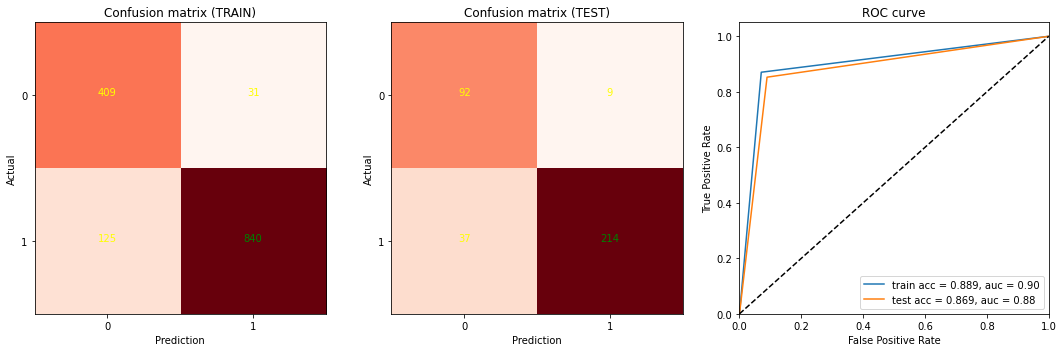

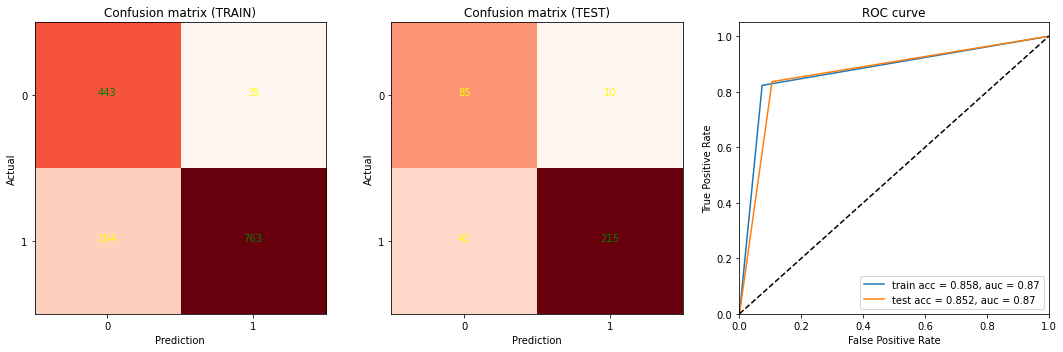

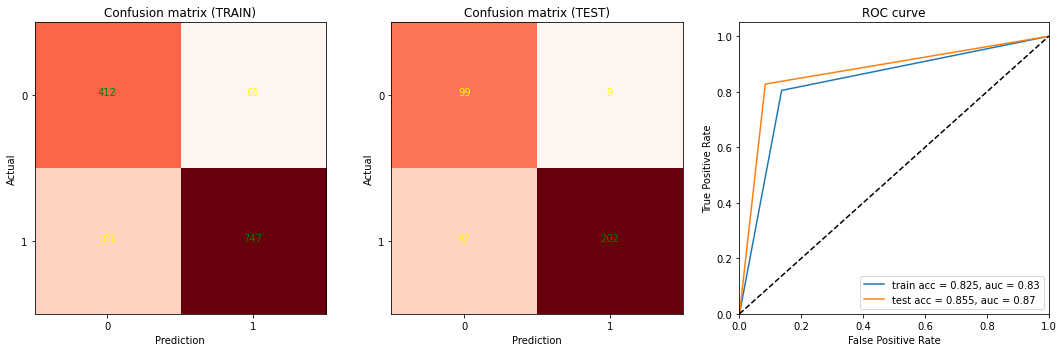

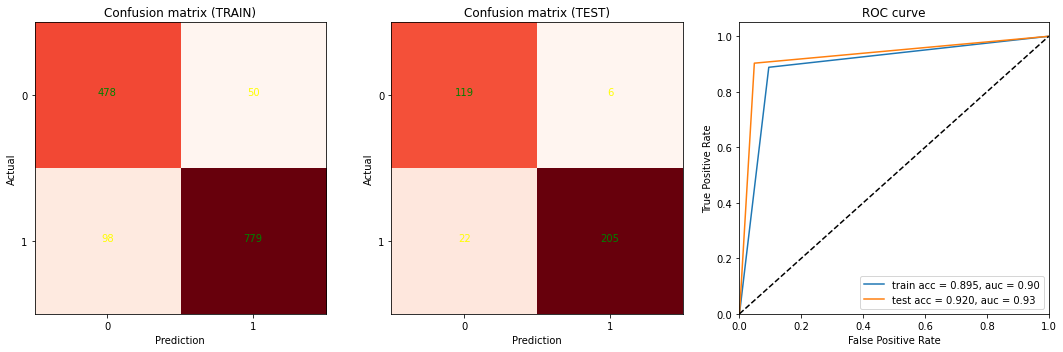

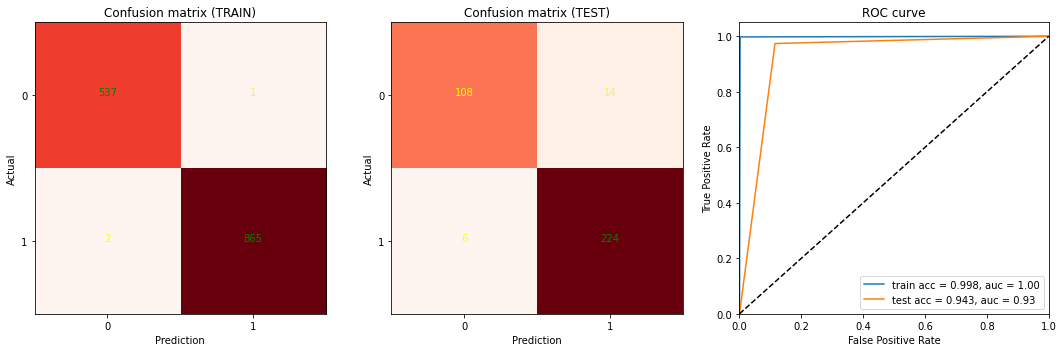

In [46]:

for k in range(len(tickers)):
  result(rf,x_train_dataset[k],x_test_dataset[k], y_train_dataset[k],y_test_dataset[k], 0.7)



In [47]:
def final_results(ticker):
  idx = tickers.index(ticker)
  backtestdata = pd.DataFrame(index = x_test_dataset[idx].index)
  backtestdata['pred signal'] = predictions[idx] 
  backtestdata['actual signal'] = y_test_dataset[idx]
  backtestdata['market returns'] = total_data[idx]['Close'].pct_change()
  backtestdata['actual returns'] = backtestdata['market returns']*backtestdata['actual signal'].shift(1)
  backtestdata['strategy returns'] = backtestdata['market returns']*backtestdata['pred signal'].shift(1)

  return backtestdata

In [48]:
backtestdata = []
for i in range(len(tickers)):
  backtestdata.append(final_results(tickers[i]))

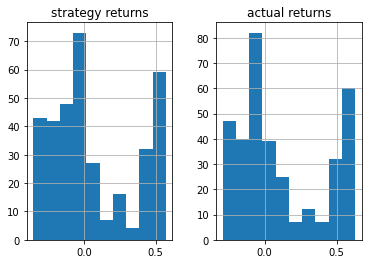

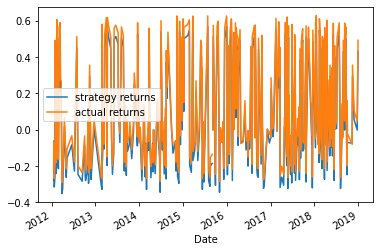

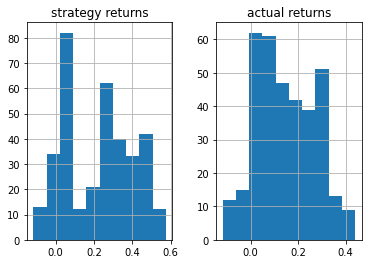

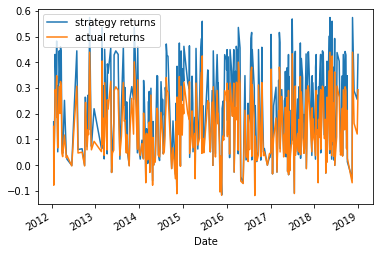

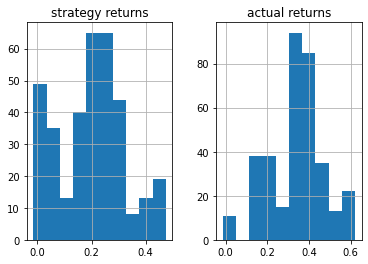

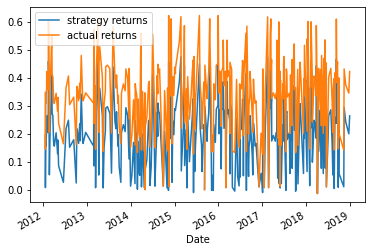

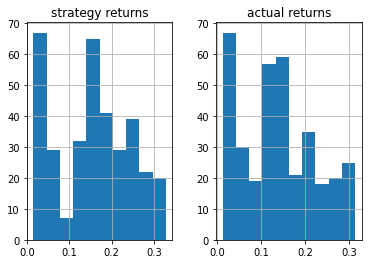

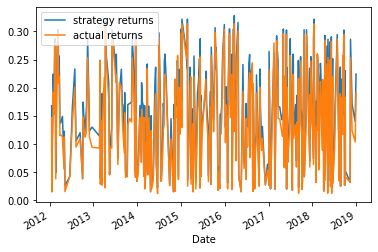

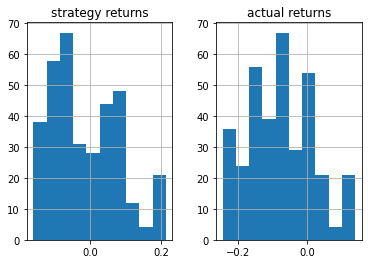

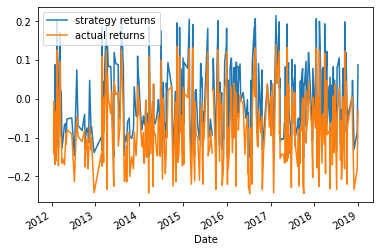

In [49]:
for i in range(len(backtestdata)):
  backtestdata[i][['strategy returns', 'actual returns']].cumsum().hist()
  backtestdata[i][['strategy returns', 'actual returns']].cumsum().plot()


All fine for now, I should add bagging (as we were getting good results with all 5 classifiers), optimizing threshold of accuracy, hyperparameter tuning of classifiers. let's save it for another day.